In [2]:
import pandas as pd
pd.options.display.max_colwidth=100
from opensky_api import OpenSkyApi
import tweepy
import time
starttime = time.time()
#from geopandas import GeoDataFrame
#from geopandas import points_from_xy
#import geopandas
#import pyproj
#import contextily as cx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime
from svgpath2mpl import parse_path
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# import cartopy.io.img_tiles as cimgt

#dc = geopandas.GeoDataFrame.from_file(r"C:\Users\Shiraz\Desktop\aviation\Sky_Reports\Washington_DC_Boundary-shp\Washington_DC_Boundary.shp")

# lookup= pd.read_csv(r"C:\Users\Shiraz\Desktop\aviation\_My_database\lookup.csv")
# lookup['operator'] = lookup['operator'].astype(str)

# Authenticate to Twitter
auth = tweepy.OAuthHandler("yhAXmaltAhp9KZAZE6V14faxc", "DrGDtzXgnpRszePCEluylPZBvhywc0FbNbOCnyWpb7vwzi8X02")
auth.set_access_token("1301879949893283847-JRkijsDib10KaoKta3O4Uf852toAWX", "Hui802GaKsHe209L5k5oVmJvKrjSXSb4rN9zUUUO2Zyj2")

# Create API object
api2 = tweepy.API(auth)

try:
    api2.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

# Create a tweet
#api2.update_status("Hello Tweepy")

Authentication OK


In [15]:
df = pd.read_csv(r"C:\Users\Shiraz\Desktop\aviation\raspberrypi_stuff\carto_testing - Sheet1.csv")

In [16]:
df

,level_0,index,long,lat,call,altitude,icao24,feet,operator,type,hashtag,icon,graph,geometry,date_pulled,Unnamed: 0
0,0,0,-76.96,38.86,N911DC,236.22,ac9ab0,775,Washington DC Police,NaN,#DC #Police #MPDC,H,DC Police,POINT (-76.95999999999999 38.86),2020-12-11 13:12,NaN


In [3]:
heli =parse_path("""M11181 5765 c-35 -8 -98 -25 -140 -39 -74 -24 -313 -90 -456 -126
-38 -10 -149 -39 -245 -64 -190 -50 -196 -52 -475 -127 -104 -28 -224 -59
-265 -69 -103 -24 -350 -87 -435 -110 -119 -33 -187 -51 -270 -71 -44 -10
-102 -25 -130 -33 -27 -8 -113 -31 -190 -51 -77 -21 -178 -48 -225 -61 -47
-12 -130 -35 -185 -49 -55 -15 -113 -31 -130 -35 -74 -20 -244 -65 -400 -105
-93 -24 -197 -51 -230 -60 -213 -57 -536 -139 -830 -210 -104 -25 -218 -53
-253 -62 -49 -13 -68 -14 -88 -4 -18 8 -36 8 -62 1 -38 -10 -125 -30 -224 -51
-50 -10 -60 -10 -75 3 -29 26 -92 38 -199 38 -175 0 -339 -39 -408 -97 -29
-24 -34 -25 -106 -18 -129 13 -202 11 -238 -9 -31 -16 -46 -16 -160 -7 -70 6
-181 15 -247 21 -66 5 -237 23 -380 40 -143 17 -386 44 -540 60 -154 16 -320
34 -370 40 -49 6 -175 19 -280 30 -448 45 -1141 121 -1275 139 -213 29 -316
40 -505 56 -464 39 -744 66 -880 85 -38 5 -116 12 -171 16 -99 6 -102 6 -109
-16 -4 -14 -2 -27 6 -36 9 -8 124 -25 344 -49 605 -65 1244 -135 1895 -206
1352 -146 1580 -171 2115 -229 303 -33 553 -60 556 -60 3 0 11 -11 17 -25 8
-18 19 -25 40 -25 16 0 31 -3 34 -6 4 -3 53 -6 111 -7 123 -2 133 -8 179 -103
43 -90 38 -108 -47 -166 -67 -46 -104 -80 -123 -114 -5 -10 -52 -27 -121 -45
-204 -52 -330 -129 -564 -348 l-88 -82 -62 3 c-42 2 -65 -1 -72 -10 -7 -9 -43
-15 -101 -17 -50 -2 -102 -9 -118 -14 -15 -6 -66 -20 -114 -31 -48 -12 -116
-28 -151 -36 -77 -18 -117 -38 -152 -75 -34 -36 -44 -36 -58 -1 -6 15 -23 41
-37 57 l-25 30 21 -42 c30 -63 26 -77 -32 -119 -64 -45 -271 -227 -543 -477
-11 -11 -89 -80 -172 -155 -84 -74 -153 -139 -153 -144 0 -16 -19 -8 -25 12
-11 33 -41 23 -89 -31 -44 -49 -56 -81 -18 -46 23 21 32 21 32 0 0 -9 -46 -64
-103 -122 -127 -131 -162 -193 -162 -292 0 -59 4 -72 34 -116 52 -76 181 -151
364 -212 105 -35 473 -95 677 -111 69 -5 270 -10 447 -10 197 0 324 -4 328
-10 9 -14 -7 -17 -238 -36 -43 -4 -80 -11 -83 -15 -8 -14 35 -49 61 -49 17 0
46 -19 89 -59 35 -32 74 -62 87 -65 70 -19 99 -30 99 -37 0 -11 -20 -15 -200
-33 -363 -38 -500 -56 -500 -67 0 -11 54 -39 77 -39 10 0 43 -25 73 -55 40
-40 62 -55 82 -55 28 0 122 -33 238 -83 73 -32 218 -86 282 -106 92 -29 236
-28 518 4 124 14 286 32 360 40 74 8 176 19 225 25 50 5 128 14 175 20 47 5
159 17 250 26 91 8 201 19 245 24 215 23 287 30 370 35 273 15 1193 76 1211
80 35 8 42 56 10 68 -6 3 -200 -8 -431 -24 -427 -29 -543 -33 -582 -23 -23 6
-42 43 -46 89 -2 27 1 30 38 37 63 12 422 37 898 62 435 24 467 28 467 61 0
35 -24 38 -238 26 -248 -14 -349 -16 -422 -6 -51 6 -57 10 -77 44 -34 59 -99
358 -87 401 4 14 6 35 5 47 -1 13 5 23 16 27 10 3 27 20 36 36 16 27 17 31 2
36 -8 4 -35 3 -60 0 -44 -7 -44 -7 -60 30 -9 21 -13 44 -11 51 6 14 159 92
500 253 236 111 241 113 405 147 91 18 218 42 282 53 64 11 128 24 141 29 14
5 105 26 204 46 165 33 350 73 1494 325 626 138 1309 286 1479 321 l155 32 22
-27 c13 -14 26 -26 29 -26 9 0 75 -50 100 -75 43 -43 224 -188 309 -249 40
-28 68 -59 103 -117 43 -71 53 -81 104 -103 32 -14 104 -37 161 -51 56 -15
150 -40 207 -56 111 -31 170 -39 116 -15 -16 7 -59 20 -95 30 -121 32 -235 68
-244 77 -17 15 26 50 119 96 50 25 91 47 93 48 3 3 -34 104 -68 185 -46 107
-150 375 -150 385 0 10 112 38 206 52 38 6 80 40 89 72 l7 24 -161 -7 c-139
-6 -161 -5 -161 8 0 8 17 84 39 168 21 84 59 241 85 348 26 107 50 209 55 225
8 26 49 191 122 489 10 44 19 83 19 88 0 4 -36 8 -80 8 l-80 0 -14 35 c-27 63
-66 56 -66 -12 0 -30 -3 -33 -29 -33 -16 0 -38 -8 -49 -17 -17 -16 -131 -265
-132 -289 -1 -5 -9 -27 -20 -49 -11 -22 -19 -43 -20 -47 0 -4 -13 -35 -29 -70
-48 -104 -68 -152 -76 -178 -4 -14 -11 -30 -16 -36 -5 -6 -15 -28 -23 -50 -7
-21 -23 -59 -34 -84 -11 -25 -36 -85 -57 -135 -20 -49 -49 -119 -64 -155 l-27
-65 -90 -7 c-49 -4 -168 -11 -264 -17 -97 -5 -188 -15 -204 -21 -25 -9 -32 -7
-60 18 -38 34 -204 208 -307 323 -89 98 -118 117 -153 101 -14 -6 -32 -23 -42
-36 -15 -24 -15 -29 1 -68 20 -51 43 -78 208 -248 86 -88 125 -136 119 -142
-6 -6 -109 -14 -229 -19 -120 -5 -294 -13 -388 -19 -93 -5 -318 -17 -500 -25
-325 -14 -530 -26 -835 -46 -241 -15 -535 -29 -772 -36 l-216 -6 -22 44 c-22
44 -58 89 -70 89 -4 0 -73 36 -155 81 -82 44 -176 93 -210 109 -71 34 -204
107 -225 124 -35 29 -85 37 -275 44 l-199 7 -13 44 c-14 48 -38 81 -60 81 -8
0 -32 -9 -54 -21 -39 -19 -42 -19 -60 -3 -10 9 -24 32 -31 52 l-13 34 -305 -7
c-168 -4 -323 -10 -345 -15 -98 -20 -275 -33 -298 -23 -12 6 -29 13 -38 16
-19 6 -29 72 -29 188 0 49 4 80 13 87 6 5 379 107 827 227 1672 445 2513 674
3090 842 162 47 385 110 495 140 110 29 247 69 305 87 120 39 261 79 475 134
165 44 343 96 351 105 17 17 -37 97 -64 96 -9 0 -46 -7 -81 -14z m-4467 -3956
c42 -33 33 -46 -36 -53 -35 -4 -78 -9 -95 -13 -26 -4 -33 -2 -33 12 0 10 22
27 63 45 34 16 65 29 68 30 4 0 18 -9 33 -21z m211 -135 c0 -11 5 -27 12 -35
11 -14 38 -118 68 -264 11 -53 14 -99 10 -137 -8 -68 6 -62 -205 -78 -74 -5
-186 -15 -248 -21 -62 -6 -116 -8 -120 -4 -4 4 -9 91 -12 193 -3 103 -8 192
-12 198 -4 6 -3 39 3 73 9 50 15 62 33 65 11 3 102 10 201 16 99 6 191 13 205
14 50 6 65 2 65 -20z m-577 -102 c3 -99 9 -95 -158 -112 -120 -11 -233 -24
-360 -40 -41 -5 -127 -14 -190 -20 -63 -6 -124 -13 -136 -15 -29 -6 -54 63
-35 98 11 21 32 27 194 56 100 18 198 37 217 42 147 37 262 61 337 68 137 13
128 19 131 -77z m-9 -190 c9 -16 16 -72 19 -143 4 -106 2 -117 -14 -123 -10
-4 -93 -11 -184 -16 -91 -6 -235 -17 -320 -25 -85 -9 -184 -15 -220 -13 l-65
3 -27 55 c-34 67 -54 179 -35 196 6 6 91 18 187 28 96 10 261 28 365 40 265
32 277 32 294 -2z m-1469 -51 c0 -5 -9 -13 -20 -16 -32 -10 -23 -33 20 -55 46
-23 49 -38 16 -69 -20 -19 -47 -25 -192 -41 -93 -11 -216 -26 -274 -34 -99
-13 -108 -12 -155 6 -69 27 -85 44 -85 90 0 33 5 41 33 58 43 27 54 25 72 -10
21 -40 48 -38 73 4 25 42 31 43 253 60 213 17 259 18 259 7z m553 -96 c17 -70
16 -154 -2 -184 -7 -10 -62 -19 -188 -32 -98 -10 -193 -19 -210 -19 l-33 0 0
81 c0 44 5 90 11 102 9 16 9 22 0 25 -17 6 -13 27 7 45 12 11 52 20 123 28 57
6 131 14 164 19 108 14 108 14 128 -65z m-1349 9 c3 -9 6 -25 6 -35 0 -18 -6
-20 -51 -17 -55 3 -78 21 -66 52 9 23 102 23 111 0z m849 -184 c6 -48 5 -66
-5 -72 -7 -5 -78 -7 -158 -5 -123 4 -156 8 -219 30 -40 14 -76 29 -80 32 -17
18 45 33 205 49 97 10 188 22 203 26 41 13 45 8 54 -60z m1447 -49 c0 -40 -19
-90 -39 -100 -18 -10 -24 -11 -586 -71 -382 -41 -671 -70 -692 -70 -18 0 -44
69 -41 105 l3 30 110 12 c143 16 482 51 665 68 80 8 195 19 255 25 61 6 152
15 204 20 52 6 96 12 99 15 10 10 22 -8 22 -34z m-2008 -20 c202 -81 291 -101
441 -101 l127 0 0 -30 c0 -17 -6 -46 -14 -65 -11 -26 -23 -36 -53 -44 -82 -21
-474 -53 -591 -49 -116 4 -119 5 -214 51 -54 26 -101 47 -106 47 -20 0 -128
53 -149 73 -15 13 -23 32 -23 54 0 31 4 36 46 54 25 12 86 25 137 30 51 5 124
13 162 18 39 4 80 9 92 10 13 0 78 -21 145 -48z m-678 -37 c16 -42 8 -54 -37
-54 -46 0 -67 13 -67 41 0 28 94 40 104 13z""")

airplane = parse_path("""M8433 5748 c3 -7 55 -138 116 -291 61 -152 111 -281 111 -287 0 -8
-959 -1240 -994 -1278 -8 -8 -402 -48 -1251 -127 -1486 -137 -1478 -136 -1826
-136 -293 0 -394 7 -716 47 -218 27 -319 49 -428 95 -110 46 -103 31 -77 166
13 65 26 128 29 141 5 22 5 22 -125 22 l-131 0 -38 -55 c-21 -30 -41 -55 -44
-55 -10 0 -223 174 -384 314 -285 247 -794 713 -1097 1004 -64 61 -124 112
-133 112 -22 0 -407 -89 -414 -96 -3 -3 -1 -13 5 -22 30 -49 1154 -2061 1160
-2075 5 -13 0 -17 -17 -17 -41 0 -99 -20 -99 -34 0 -7 9 -42 20 -76 11 -34 20
-64 20 -65 0 -8 -130 -43 -535 -145 -768 -194 -1376 -354 -1480 -390 -99 -34
-128 -78 -86 -132 33 -41 86 -56 251 -71 l155 -14 245 59 c368 89 474 115
1118 272 l592 145 53 -23 c187 -83 873 -325 1207 -425 149 -45 152 -46 630
-99 306 -34 356 -37 580 -35 135 1 274 4 310 7 84 7 74 3 -190 -83 -250 -81
-1036 -337 -1387 -452 -134 -43 -353 -115 -488 -159 -135 -44 -355 -116 -490
-160 -135 -44 -354 -116 -487 -159 -134 -44 -301 -98 -371 -121 l-128 -42 -32
25 c-18 14 -104 82 -192 151 -136 107 -165 126 -195 126 -40 0 -393 -30 -397
-34 -2 -1 71 -68 160 -149 178 -159 281 -263 347 -351 81 -107 155 -131 405
-130 166 0 173 1 290 36 66 20 305 91 530 158 226 67 583 173 795 236 212 64
552 165 755 226 298 89 1882 564 2040 612 39 12 41 12 91 -31 53 -44 74 -53
74 -30 0 37 85 76 164 77 l29 0 -46 -48 c-72 -78 -94 -135 -62 -162 14 -12 34
-11 96 5 21 5 27 -1 48 -45 30 -64 106 -133 174 -158 61 -23 368 -48 455 -37
30 4 170 10 311 15 165 5 268 12 291 21 61 22 209 120 244 160 41 48 96 176
105 244 8 59 0 110 -35 223 -30 101 -80 158 -162 187 -29 11 -52 22 -52 25 0
3 75 13 168 23 92 9 298 30 457 47 160 16 477 43 705 60 954 69 2031 170 2470
231 336 46 560 131 847 321 170 113 274 213 293 281 17 61 8 112 -28 156 -40
50 -195 153 -360 239 -77 40 -146 79 -153 88 -46 56 -243 137 -479 197 -462
118 -553 131 -895 123 -351 -7 -1125 -58 -1795 -116 -124 -11 -237 -20 -252
-20 -27 0 -27 1 -14 33 8 17 103 281 211 586 173 483 196 557 185 574 -7 11
-106 146 -221 299 l-209 278 -176 0 c-137 0 -175 -3 -171 -12z""")

In [4]:
heli.vertices -= heli.vertices.mean(axis=0)
airplane.vertices -= airplane.vertices.mean(axis=0)

In [5]:

def fill(arg):
    df.loc[df['call'].str.contains('RCH'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('RCH'), 'hashtag'] = '#Airforce'
    df.loc[df['call'].str.contains('RCH'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('RCH'), 'graph'] = 'Air Force'

    df.loc[df['call'].str.contains('PAT'), 'operator'] = 'Dept. of Army'
    df.loc[df['call'].str.contains('PAT'), 'hashtag'] = '#Army'
    df.loc[df['call'].str.contains('PAT'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('PAT'), 'graph'] = 'Army'
    
    df.loc[df['call'].str.contains('TITUS'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('TITUS'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('TITUS'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('TITUS'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('SAM'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('SAM'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('SAM'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('SAM'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('BOX'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('BOX'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('BOX'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('BOX'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('LIFT'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('LIFT'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('LIFT'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('LIFT'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('VENUS'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('VENUS'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('VENUS'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('VENUS'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('SPAR'), 'operator'] = 'U.S. Military'
    df.loc[df['call'].str.contains('SPAR'), 'hashtag'] = '#USMilitary'
    df.loc[df['call'].str.contains('SPAR'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('SPAR'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('ENRGY'), 'operator'] = 'Dept. of Energy'
    df.loc[df['call'].str.contains('ENRGY'), 'hashtag'] = '#DOE'
    df.loc[df['call'].str.contains('ENRGY'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('ENRGY'), 'graph'] = 'DOE'
    
    df.loc[df['call'].str.contains('CAP'), 'operator'] = 'Civil Air Patrol'
    df.loc[df['call'].str.contains('CAP'), 'hashtag'] = '#CivilAirPatrol'
    df.loc[df['call'].str.contains('CAP'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('CAP'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('TURTLE'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('TURTLE'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('TURTLE'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('TURTLE'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('AZAZ'), 'operator'] = 'Dept. of Army'
    df.loc[df['call'].str.contains('AZAZ'), 'hashtag'] = '#Army'
    df.loc[df['call'].str.contains('AZAZ'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('AZAZ'), 'graph'] = 'Army'
    
    df.loc[df['call'].str.contains('PARD'), 'operator'] = 'Civil Air Patrol'
    df.loc[df['call'].str.contains('PARD'), 'hashtag'] = '#CivilAirPatrol'
    df.loc[df['call'].str.contains('PARD'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('PARD'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('JENA'), 'operator'] = 'U.S Dept. of Justice'
    df.loc[df['call'].str.contains('JENA'), 'hashtag'] = '#DOJ'
    df.loc[df['call'].str.contains('JENA'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('JENA'), 'graph'] = 'DOJ'
    
    df.loc[df['call'].str.contains('FLC'), 'operator'] = 'Federal Aviation Administration'
    df.loc[df['call'].str.contains('FLC'), 'hashtag'] = '#FAA'
    df.loc[df['call'].str.contains('FLC'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('FLC'), 'graph'] = 'FAA'
    
    df.loc[df['call'].str.contains('CLUB'), 'operator'] = 'U.S. Air Force - Nightwatch "Doomsday" Aircraft'
    df.loc[df['call'].str.contains('CLUB'), 'hashtag'] = '#AirFroce #Doomsday #Nightwatch'
    df.loc[df['call'].str.contains('CLUB'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('CLUB'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('TERRA'), 'operator'] = 'U.S. Air Force'
    df.loc[df['call'].str.contains('TERRA'), 'hashtag'] = '#AirForce'
    df.loc[df['call'].str.contains('TERRA'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('TERRA'), 'graph'] = 'Air Force'
    
    df.loc[df['call'].str.contains('CNV'), 'operator'] = 'U.S. Navy'
    df.loc[df['call'].str.contains('CNV'), 'hashtag'] = '#Navy'
    df.loc[df['call'].str.contains('CNV'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('CNV'), 'graph'] = 'Navy'
    
    df.loc[df['call'].str.contains('LOBO'), 'operator'] = 'U.S. Marines'
    df.loc[df['call'].str.contains('LOBO'), 'hashtag'] = '#MarineCorps'
    df.loc[df['call'].str.contains('LOBO'), 'icon'] = 'A'
    df.loc[df['call'].str.contains('LOBO'), 'graph'] = 'Marine Corps'



def database(arg):
    if df.empty == False:
        df['date_pulled']= pd.datetime.now().strftime("%Y-%m-%d %H:%M")
        mine = pd.read_csv(r"C:\Users\Shiraz\Desktop\aviation\_My_database\mine.csv")
        result = df.append(mine,sort=False)
        #result['date_pulled']= pd.datetime.now().strftime('%D')
        result.to_csv(r"C:\Users\Shiraz\Desktop\aviation\_My_database\mine_test.csv", index=False)
    else:
        print('No new data for database')

        
      
        
def again(arg):
     

    if df.loc[0].empty==False:
        #Mapping
        if df.loc[0,'icon']=='H':
            icon = heli
            si=2000
        elif df.loc[0,'icon']=='A':
            icon = airplane
            si=2000
        else:
            icon = '.'
            si=1000
        plt.figure(figsize = (12, 12))
        img = cimgt.GoogleTiles()
        ax = plt.axes(projection = img.crs)
        ax.set_extent([-76.849495,-77.22159,39.01713,38.77118])
        ax.add_image(img, 12)
        plt.scatter(df.iloc[0]['long'], df.iloc[0]['lat'], transform = ccrs.PlateCarree(),c = 'r', s =si,marker=icon) 
        #plt.scatter(df.iloc[0]['long'],df.iloc[0]['lat'] ,marker=icon, s=si, c="r", label=df.iloc[0]['call'])
        #ax.legend(loc='upper left', prop={'size': 15},title='Legend',facecolor='gray',markerscale=.5)
        plt.savefig('map1.png', dpi=100, bbox_inches = 'tight',pad_inches = 0)
        
        #Tweeting
        if df.loc[0,'operator']=='x':
            ops = ' is over Latitude: '+df.loc[0,'lat'].astype(str)+ ' and Longitude: '+ df.loc[0,'long'].astype(str)+ ' flying at Altitude: '+df.loc[0,'altitude'].astype(str)+'ft. '+df.loc[0,'hashtag']+' #ADSB'
        else:
            ops = ' operated by '+ df.loc[0,'operator']+' is over Latitude: '+df.loc[0,'lat'].astype(str)+ ' and Longitude: '+ df.loc[0,'long'].astype(str)+ ' flying at Altitude: '+df.loc[0,'altitude'].astype(str)+'ft. '+df.loc[0,'hashtag']+' #ADSB'
        media = api2.media_upload('map1.png')
        tweet = 'Aircraft #'+df.loc[0,'call']+ ops
        #post_result = api2.update_status(status=tweet, media_ids=[media.media_id])
        print(tweet)
    else:
        print('no 1st')

    if df.loc[1:].empty == False:
        #Mapping
        if df.loc[1,'icon']=='H':
            icon = heli
            si=2000
        elif df.loc[1,'icon']=='A':
            icon = airplane
            si=2000
        else:
            icon = '.'
            si=1000
        plt.figure(figsize = (12, 12))
        img = cimgt.GoogleTiles()
        ax = plt.axes(projection = img.crs)
        ax.set_extent([-76.849495,-77.22159,39.01713,38.77118])
        ax.add_image(img, 12)
        plt.scatter(df.iloc[1]['long'], df.iloc[1]['lat'], transform = ccrs.PlateCarree(),c = 'r', s =si,marker=icon) 
        #plt.scatter(df.iloc[1]['long'],df.iloc[1]['lat'] ,marker=icon, s=si, c="r", label=df.iloc[1]['call'])
        #ax.legend(loc='upper left', prop={'size': 15},title='Legend',facecolor='gray',markerscale=.5)
        plt.savefig('map1.png', dpi=100, bbox_inches = 'tight',pad_inches = 0)
        
        plt.figure(figsize = (12, 12))
img = cimgt.GoogleTiles()
ax = plt.axes(projection = img.crs)
ax.set_extent([-76.849,-77.221,39.017,38.771])
ax.add_image(img, 12)
plt.scatter(df['long'], df['lat'], transform = ccrs.PlateCarree(),
            c = '#E8175D', s=2000, marker=heli)
    
    
    
        #Tweeting
        if df.loc[1,'operator']=='x':
            ops = ' is over Latitude: '+df.loc[1,'lat'].astype(str)+ ' and Longitude: '+ df.loc[1,'long'].astype(str)+ ' flying at Altitude: '+df.loc[1,'altitude'].astype(str)+'ft. '+df.loc[1,'hashtag']+' #ADSB'
        else:
            ops = ' operated by '+ df.loc[1,'operator']+' is over Latitude: '+df.loc[1,'lat'].astype(str)+ ' and Longitude: '+ df.loc[1,'long'].astype(str)+ ' flying at Altitude: '+df.loc[1,'altitude'].astype(str)+'ft. '+df.loc[1,'hashtag']+' #ADSB'
        media = api2.media_upload('map2.png')
        tweet = 'Aircraft #'+df.loc[1,'call']+ ops
        #post_result = api2.update_status(status=tweet, media_ids=[media.media_id])
        print(tweet)    
        
    else:
        print('no 2nd')
        
    if df.loc[2:].empty == False:
        #Mapping
        if df.loc[2,'icon']=='H':
            icon = heli
            si=2000
        elif df.loc[2,'icon']=='A':
            icon = airplane
            si=2000
        else:
            icon = '.'
            si=1000
        plt.figure(figsize = (12, 12))
        img = cimgt.GoogleTiles()
        ax = plt.axes(projection = img.crs)
        ax.set_extent([-76.849495,-77.22159,39.01713,38.77118])
        ax.add_image(img, 12)
        plt.scatter(df.iloc[2]['long'], df.iloc[2]['lat'], transform = ccrs.PlateCarree(),c = 'r', s =si,marker=icon) 
        #plt.scatter(df.iloc[2]['long'],df.iloc[2]['lat'] ,marker=icon, s=si, c="r", label=df.iloc[2]['call'])
        #ax.legend(loc='upper left', prop={'size': 15},title='Legend',facecolor='gray',markerscale=.5)
        plt.savefig('map1.png', dpi=100, bbox_inches = 'tight',pad_inches = 0)
        
        #Tweeting
        if df.loc[2,'operator']=='x':
            ops = ' is over Latitude: '+df.loc[2,'lat'].astype(str)+ ' and Longitude: '+ df.loc[2,'long'].astype(str)+ ' flying at Altitude: '+df.loc[2,'altitude'].astype(str)+'ft. '+df.loc[2,'hashtag']+' #ADSB'
        else:
            ops = ' operated by '+ df.loc[2,'operator']+' is over Latitude: '+df.loc[2,'lat'].astype(str)+ ' and Longitude: '+ df.loc[2,'long'].astype(str)+ ' flying at Altitude: '+df.loc[2,'altitude'].astype(str)+'ft. '+df.loc[2,'hashtag']+' #ADSB'
        media = api2.media_upload('map3.png')
        tweet = 'Aircraft #'+df.loc[2,'call']+ ops
        #post_result = api2.update_status(status=tweet, media_ids=[media.media_id])
        print(tweet)
        
    else:
        print('no 3rd')    
        
        

def make_geodf(arg, lat_col_name='lat', lon_col_name='long'):
    """
    Take a dataframe with latitude and longitude columns, and turn
    it into a geopandas df.
    """

    df = arg.copy()
    lat = arg['lat']
    lon = arg['long']
    return GeoDataFrame(arg, geometry=points_from_xy(lon, lat))

        
        
def test(arg):
    if df.empty==True:
        print('Dataset was empty!')
    else:
        #make_geodf(df)
        fill(df)
        database(df)
        again(df)
        


In [9]:
api = OpenSkyApi()
yo= []
# bbox = (min latitude, max latitude, min longitude, max longitude)
states = api.get_states(bbox=(45.8389, 47.8229, 5.9962, 10.5226))
for s in states.states:
    x=s.longitude, s.latitude, s.callsign, s.geo_altitude, s.icao24
    yo.append(x)

    
df=pd.DataFrame(yo,columns=['long','lat','call','altitude','icao24'])


#38.793968, 39.002143, -77.170372, -76.868058
#45.8389, 47.8229, 5.9962, 10.5226

In [1]:
#Dict of dropped callsigns
searchfor = ['UAL', 'SWA','DAL','RPA','JIA','AAL','JBU','PDT','ASH','ABD','JZA','FFT',
             'SKW','GJS','ASA','JTL','AF','EDV','LVT','EJA','UJC','MLN','SCX','XOJ','COO','LXJ','ENY']

#Take out space after callsign
df.call = df.call.str.replace(' ', '')

#Drop bad callsigns and convert altitude to feet
df=df[~df.call.str.contains('|'.join(searchfor))]
df = df[df['altitude']>1].reset_index()
df['feet'] = df['altitude']*3.28084
df['feet'] =(round(df['feet'], 2))
df['lat'] =(round(df['lat'], 2))
df['long'] =(round(df['long'], 2))
df = df[df['feet']<1100000].reset_index()

#Merge DF with lookup table and fill in operator and hashtag NANs
df = df.merge(lookup,on='call', how='left')
df['operator'].fillna('x', inplace=True)
df['graph'].fillna('Other',inplace=True)
df['hashtag'].fillna('#WashingtonDC', inplace=True)

NameError: name 'df' is not defined

<ipython-input-5-43379e56e04c>:101: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['date_pulled']= pd.datetime.now().strftime("%Y-%m-%d %H:%M")


Aircraft #ABR1441 is over Latitude: 47.14 and Longitude: 8.41 flying at Altitude: 9936.48ft. #WashingtonDC #ADSB
no 2nd
no 3rd


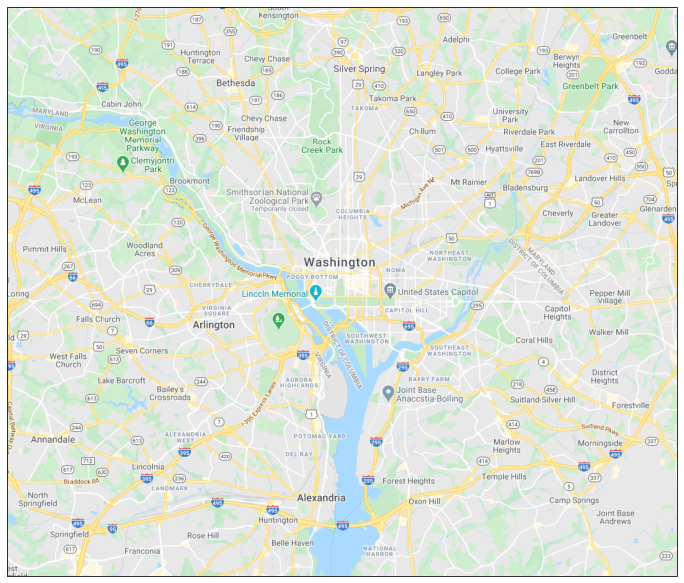

In [13]:
test(df)

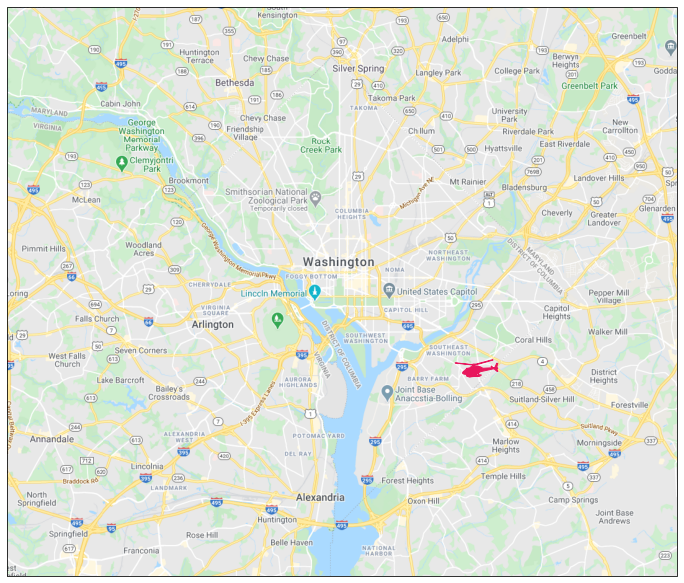

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

#plt.scatter(df.iloc[2]['long'],df.iloc[2]['lat'] ,marker=icon, s=si, c="r", label=df.iloc[0]['call'])


plt.figure(figsize = (12, 12))
img = cimgt.GoogleTiles()
ax = plt.axes(projection = img.crs)
ax.set_extent([-76.849,-77.221,39.017,38.771])
ax.add_image(img, 12)
plt.scatter(df['long'], df['lat'], transform = ccrs.PlateCarree(),
            c = '#E8175D', s=2000, marker=heli)

In [14]:
df

,level_0,index,long,lat,call,altitude,icao24,feet,operator,type,hashtag,icon,graph,date_pulled
0,0,4,8.41,47.14,ABR1441,9936.48,4ca1b3,32600.0,x,NaN,#WashingtonDC,NaN,Other,2020-12-12 23:32


In [22]:
df['long'].min()


-76.96

In [23]:
df['long'].max() 

-76.96

In [107]:
df

,level_0,index,long,lat,call,altitude,icao24,feet,operator,type,hashtag,icon,graph,date_pulled
0,0,4,8.39,47.64,UAE2502,11170.92,89631a,36650.0,x,NaN,#WashingtonDC,NaN,Other,2020-12-12 23:15
